(28, 28, 1)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


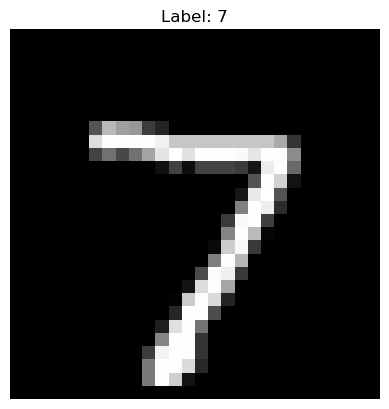

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Normalize to [0, 1]
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0    # Normalize to [0, 1]
y_train = to_categorical(y_train, num_classes=10)  # One-hot encoding
y_test = to_categorical(y_test, num_classes=10)      # One-hot encoding

# Select an image index to display
index = 0 

# Use the test dataset directly
imageToUse = x_test[index]
imageLabel = y_test[index]

print(imageToUse.shape)  # Should print (28, 28, 1)
print(imageLabel)
print(np.argmax(imageLabel))  # Prints the label as a number

# Display the image
plt.imshow(np.reshape(imageToUse, [28, 28]), interpolation='nearest', cmap='gray')
plt.title(f"Label: {np.argmax(imageLabel)}")  # Display the corresponding label
plt.axis('off')  # Hide the axes
plt.show()


In [2]:
from tensorflow.keras.models import load_model

model = load_model('mnist_model.h5')
loaded_train_accuracy = model.evaluate(x_train, y_train, verbose=0)[1]
print("Loaded model training accuracy: %.4f" % loaded_train_accuracy)

2024-09-29 15:43:15.140894: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-09-29 15:43:15.140909: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-09-29 15:43:15.140914: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-09-29 15:43:15.140937: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-29 15:43:15.140949: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-09-29 15:43:15.397771: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Loaded model training accuracy: 0.9937


In [3]:
image_in = np.reshape(imageToUse, [1, 28, 28, 1])
predict = model.predict(image_in)
predicted_class = np.argmax(predict, axis=1)
print(predicted_class)

1/1 [==============================] - 0s 56ms/step
[7]


2024-09-29 15:43:24.286926: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [4]:
print("True label : ", imageLabel.argmax())
print("Predicted label : ", predicted_class[0])
print("Match : ", predicted_class[0]== imageLabel.argmax())

True label :  7
Predicted label :  7
Match :  True


(28, 28, 1)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2


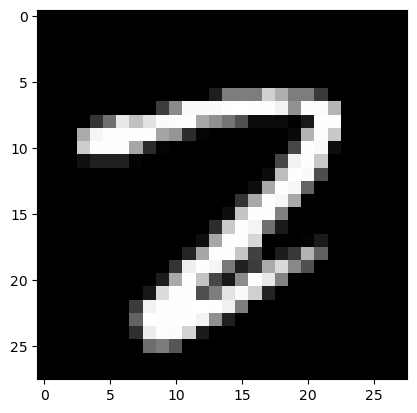

In [5]:
# Select an image index to display
index = 924

# Use the test dataset directly
imageToUse = x_test[index]
imageLabel = y_test[index]

print(imageToUse.shape)  # Should print (28, 28, 1)
print(imageLabel)
print(np.argmax(imageLabel))  # Prints the label as a number

# Display the image
plt.imshow(np.reshape(imageToUse, [28, 28]), interpolation='nearest', cmap='gray')

In [6]:
image_in = np.reshape(imageToUse, [1, 28, 28, 1])
predict = model.predict(image_in)
predicted_class = np.argmax(predict, axis=1)
print(predicted_class)

1/1 [==============================] - 0s 9ms/step
[2]


In [7]:
print("True label : ", imageLabel.argmax())
print("Predicted label : ", predicted_class[0])
print("Match : ", predicted_class[0]== imageLabel.argmax())

True label :  2
Predicted label :  2
Match :  True


In [8]:
# Get the 924th test image
index = 924
image_in = x_test[index:index + 1]  # Reshape to match model input shape

# Get the prediction probabilities
mat = model.predict(image_in)[0]  # Get the prediction for the specific image

# Display the probabilities for each class
for count, probability in enumerate(mat):
    print('[{}] {:.2f}%'.format(count, probability * 100))  # Print class index and probability


1/1 [==============================] - 0s 17ms/step
[0] 0.00%
[1] 0.22%
[2] 86.82%
[3] 10.73%
[4] 0.00%
[5] 0.02%
[6] 0.00%
[7] 1.94%
[8] 0.26%
[9] 0.00%


In [15]:
for layer in model.layers:
    print(layer.name)

x-in
conv2d_12
max_pooling2d_11
conv2d_13
max_pooling2d_12
conv2d_14
max_pooling2d_13
flatten_3
dense_3


1/1 [==============================] - 0s 20ms/step


2024-09-29 15:45:44.613855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


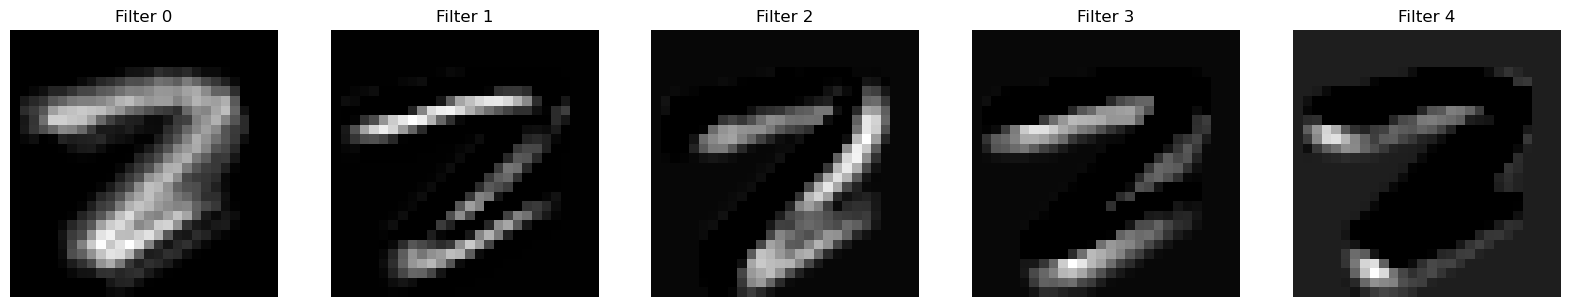

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math

def plotNNFilter(units):
    filters = units.shape[-1]  # 마지막 차원에서 필터 수 얻기
    plt.figure(figsize=(20, 20))
    n_columns = 5
    n_rows = math.ceil(filters / n_columns)
    
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i + 1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0, :, :, i], interpolation="nearest", cmap='gray')
        plt.axis('off')  # 축 제거

    plt.show()  # 그래프 출력

def get_activations(layer_name, stimuli):
    # Stimuli를 올바른 형태로 reshape
    image_in = np.reshape(stimuli, [1, 28, 28, 1])  # 28x28 이미지로 reshape

    # 지정된 레이어의 출력을 포함하는 중간 모델 생성
    intermediate_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

    # 중간 모델을 사용하여 활성화 값 얻기
    units = intermediate_model.predict(image_in)

    # 필터/활성화를 플로팅
    plotNNFilter(units)  # 필터 시각화 함수 호출

# 사용 예시
get_activations('conv2d_12', imageToUse)  # 'conv2d_12' 레이어의 활성화 시각화


1/1 [==============================] - 0s 84ms/step


2024-09-29 15:46:23.956922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


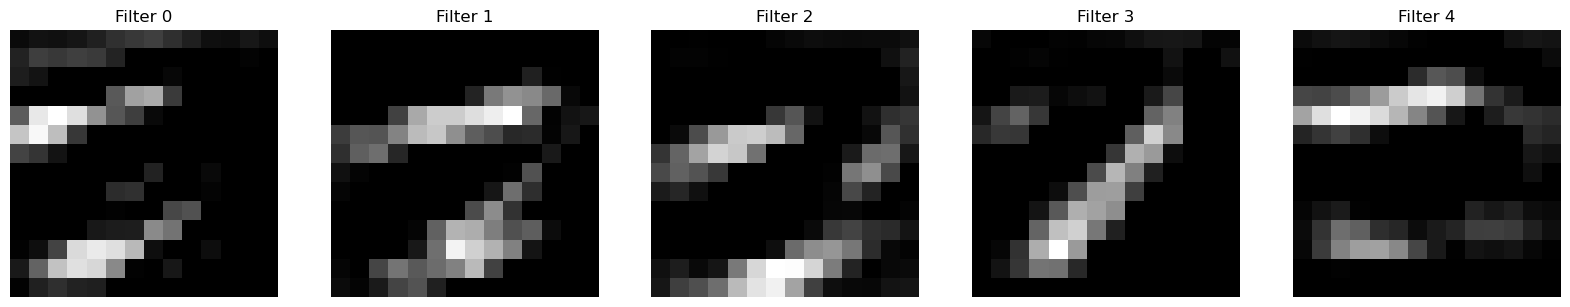

In [16]:
get_activations('conv2d_13', imageToUse)  # 'conv2d_12' 레이어의 활성화 시각화

1/1 [==============================] - 0s 53ms/step


2024-09-29 15:46:34.630880: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


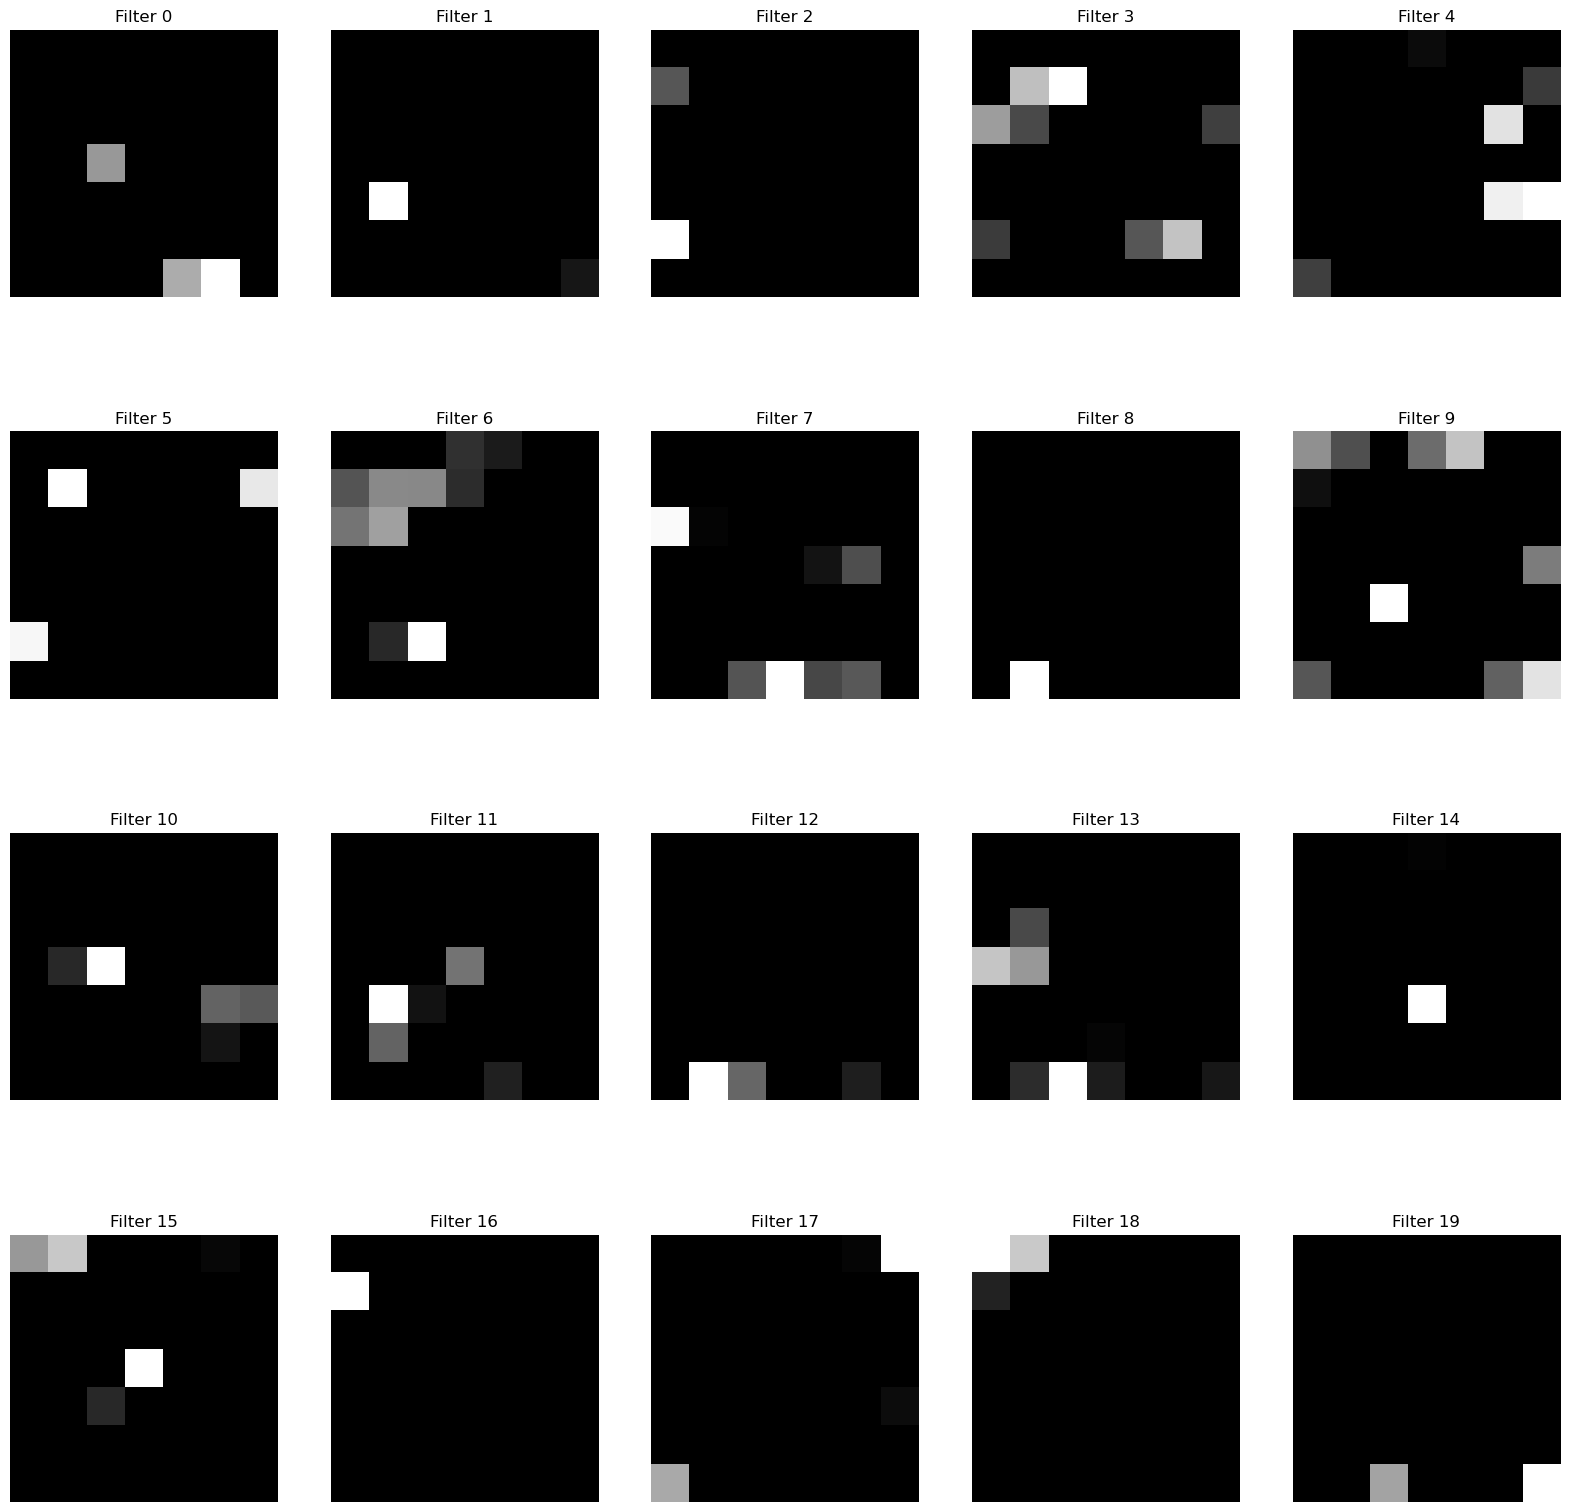

In [17]:
get_activations('conv2d_14', imageToUse)  # 'conv2d_12' 레이어의 활성화 시각화